In [1]:
import numpy as np
from scipy.integrate import solve_ivp, quad
import matplotlib.pyplot as plt

In [2]:
def a_value(z):
    return 1/(1+z)

def H(z, Omega_m, Omega_Lambda):
    a = a_value(z)
    Omega_k = 1-Omega_m-Omega_Lambda
    return np.sqrt(Omega_m*a**(-3)+Omega_Lambda+Omega_k*a**(-2))

def dH_da(z, Omega_m, Omega_Lambda):
    a = a_value(z)
    Omega_k = 1-Omega_m-Omega_Lambda
    return -(2*Omega_k*a**(-3)+3*Omega_m*a**(-4))/(2*np.sqrt(Omega_k*a**(-2)+Omega_Lambda+Omega_m*a**(-3)))

def integral_func(a, Omega_m, Omega_Lambda):
    z = 1/a-1
    return 1/(a**3*H(z, Omega_m, Omega_Lambda)**3)

def g_func(z, Omega_m, Omega_Lambda):
    integral_value = quad(integral_func, 0, a_value(z), args = (Omega_m, Omega_Lambda))[0]
    
    return H(z, Omega_m, Omega_Lambda)*integral_value

def f_func(z, Omega_m, Omega_Lambda):
    a = a_value(z)
    f_value = dH_da(z, Omega_m, Omega_Lambda)*(a/H(z, Omega_m, Omega_Lambda))\
        +1/(a**2*H(z, Omega_m, Omega_Lambda)**2*g_func(z, Omega_m, Omega_Lambda))
    
    return f_value

In [3]:
z_list  = np.linspace(0, 10, 1000)

In [4]:
f_value1 = []
f_value2 = []
f_value3 = []
for i in range(len(z_list)):
    f_value1.append(f_func(z_list[i], 0.1, 1.3))
    f_value2.append(f_func(z_list[i], 1.0, 2.0))
    f_value3.append(f_func(z_list[i], 1.0, 1.0))

In [5]:
f_value1 = np.array(f_value1)
f_value2 = np.array(f_value2)
f_value3 = np.array(f_value3)

In [6]:
f_value4 = []
f_value5 = []
f_value6 = []
f_valuea = []
for i in range(len(z_list)):
    f_value4.append(f_func(z_list[i], 0.1, 0.9))
    f_value5.append(f_func(z_list[i], 0.1, 0.5))
    f_value6.append(f_func(z_list[i], 0.1, 0.0))
    f_valuea.append(f_func(z_list[i], 1.0, 0.0))

In [7]:
f_value4 = np.array(f_value4)
f_value5 = np.array(f_value5)
f_value6 = np.array(f_value6)
f_valuea = np.array(f_valuea)

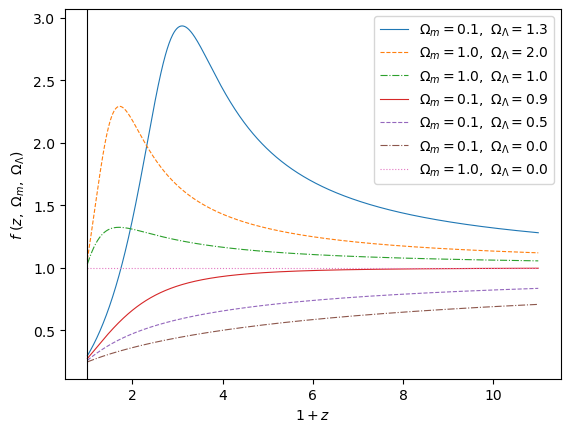

In [8]:
plt.plot(1+z_list, f_value1, linewidth = 0.8, label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=1.3$')
plt.plot(1+z_list, f_value2, linewidth = 0.8, linestyle = '--', label = r'$\Omega_{m} = 1.0,\ \Omega_{\Lambda}=2.0$')
plt.plot(1+z_list, f_value3, linewidth = 0.8, linestyle = '-.', label = r'$\Omega_{m} = 1.0,\ \Omega_{\Lambda}=1.0$')
plt.plot(1+z_list, f_value4, linewidth = 0.8, label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=0.9$')
plt.plot(1+z_list, f_value5, linewidth = 0.8, linestyle = '--', label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=0.5$')
plt.plot(1+z_list, f_value6, linewidth = 0.8, linestyle = '-.', label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=0.0$')
plt.plot(1+z_list, f_valuea, linewidth = 0.8, linestyle = ':', label = r'$\Omega_{m} = 1.0,\ \Omega_{\Lambda}=0.0$')
plt.legend()
plt.xlabel(r'$1+z$')
plt.ylabel(r'$f\ (z,\ \Omega_{m},\ \Omega_{\Lambda})$')
plt.xlim(0.5, 11.5)
plt.axvline(x=1, linewidth = 0.8, color = 'black')
#plt.savefig('/Users/zengyuhe/academic_doc/Classes/Cosmology/calculation/f_z.pdf')
plt.show()

In [9]:
del f_value1
del f_value2
del f_value3
del f_value4
del f_value5
del f_value6
del f_valuea

In [10]:
def Omega_appro(z, Omega_m, Omega_Lambda):
    Omega_appro_value = Omega_m*H(z, Omega_m, Omega_Lambda)**(-2)*(1+z)**3
    return Omega_appro_value

def f_appro(z, Omega_m, Omega_Lambda):
    Omega_appro_value = Omega_appro(z, Omega_m, Omega_Lambda)
    f_appro_value = Omega_appro_value**(0.6)+(1/70)*(1-(1/2)*Omega_appro_value*(1+Omega_appro_value))
    return f_appro_value

In [11]:
f_appro1 = []
f_appro2 = []
f_appro3 = []
f_appro4 = []
f_appro5 = []
f_appro6 = []
f_approa = []
for i in range(len(z_list)):
    f_appro1.append(f_appro(z_list[i], 0.1, 1.3))
    f_appro2.append(f_appro(z_list[i], 1.0, 2.0))
    f_appro3.append(f_appro(z_list[i], 1.0, 1.0))
    f_appro4.append(f_appro(z_list[i], 0.1, 0.9))
    f_appro5.append(f_appro(z_list[i], 0.1, 0.5))
    f_appro6.append(f_appro(z_list[i], 0.1, 0.0))
    f_approa.append(f_appro(z_list[i], 1.0, 0.0))

In [12]:
f_appro1 = np.array(f_appro1)
f_appro2 = np.array(f_appro2)
f_appro3 = np.array(f_appro3)
f_appro4 = np.array(f_appro4)
f_appro5 = np.array(f_appro5)
f_appro6 = np.array(f_appro6)
f_approa = np.array(f_approa)

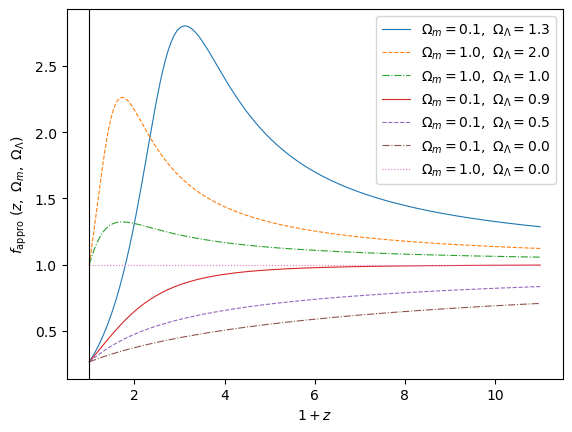

In [13]:
plt.plot(1+z_list, f_appro1, linewidth = 0.8, label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=1.3$')
plt.plot(1+z_list, f_appro2, linewidth = 0.8, linestyle = '--', label = r'$\Omega_{m} = 1.0,\ \Omega_{\Lambda}=2.0$')
plt.plot(1+z_list, f_appro3, linewidth = 0.8, linestyle = '-.', label = r'$\Omega_{m} = 1.0,\ \Omega_{\Lambda}=1.0$')
plt.plot(1+z_list, f_appro4, linewidth = 0.8, label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=0.9$')
plt.plot(1+z_list, f_appro5, linewidth = 0.8, linestyle = '--', label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=0.5$')
plt.plot(1+z_list, f_appro6, linewidth = 0.8, linestyle = '-.', label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=0.0$')
plt.plot(1+z_list, f_approa, linewidth = 0.8, linestyle = ':', label = r'$\Omega_{m} = 1.0,\ \Omega_{\Lambda}=0.0$')
plt.legend()
plt.xlabel(r'$1+z$')
plt.ylabel(r'$f_{\rm appro}\ (z,\ \Omega_{m},\ \Omega_{\Lambda})$')
plt.xlim(0.5, 11.5)
plt.axvline(x=1, linewidth = 0.8, color = 'black')
#plt.savefig('/Users/zengyuhe/academic_doc/Classes/Cosmology/calculation/f_z_appro.pdf')
plt.show()

In [14]:
del f_appro1
del f_appro2
del f_appro3
del f_appro4
del f_appro5
del f_appro6
del f_approa

In [15]:
def f_appro1(z, Omega_m, Omega_Lambda):
    f_appro1_value = (Omega_m*(1+z)**3/(Omega_m*(1+z)**3+(1-Omega_m-Omega_Lambda)*(1+z)**2+Omega_Lambda))**(4/7)
    return f_appro1_value

In [16]:
f_appro11 = []
f_appro12 = []
f_appro13 = []
f_appro14 = []
f_appro15 = []
f_appro16 = []
f_appro1a = []
for i in range(len(z_list)):
    f_appro11.append(f_appro1(z_list[i], 0.1, 1.3))
    f_appro12.append(f_appro1(z_list[i], 1.0, 2.0))
    f_appro13.append(f_appro1(z_list[i], 1.0, 1.0))
    f_appro14.append(f_appro1(z_list[i], 0.1, 0.9))
    f_appro15.append(f_appro1(z_list[i], 0.1, 0.5))
    f_appro16.append(f_appro1(z_list[i], 0.1, 0.0))
    f_appro1a.append(f_appro1(z_list[i], 1.0, 0.0))

f_appro11 = np.array(f_appro11)
f_appro12 = np.array(f_appro12)
f_appro13 = np.array(f_appro13)
f_appro14 = np.array(f_appro14)
f_appro15 = np.array(f_appro15)
f_appro16 = np.array(f_appro16)
f_appro1a = np.array(f_appro1a)

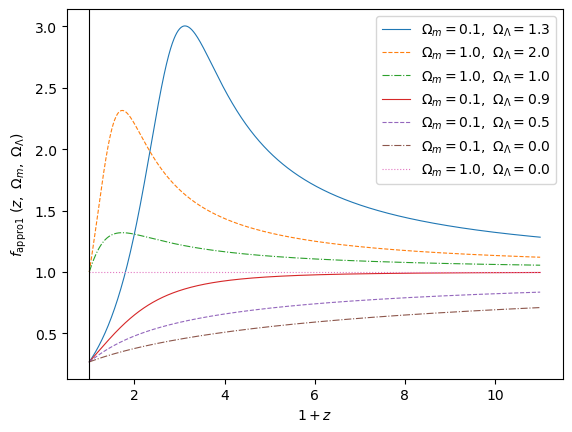

In [17]:
plt.plot(1+z_list, f_appro11, linewidth = 0.8, label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=1.3$')
plt.plot(1+z_list, f_appro12, linewidth = 0.8, linestyle = '--', label = r'$\Omega_{m} = 1.0,\ \Omega_{\Lambda}=2.0$')
plt.plot(1+z_list, f_appro13, linewidth = 0.8, linestyle = '-.', label = r'$\Omega_{m} = 1.0,\ \Omega_{\Lambda}=1.0$')
plt.plot(1+z_list, f_appro14, linewidth = 0.8, label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=0.9$')
plt.plot(1+z_list, f_appro15, linewidth = 0.8, linestyle = '--', label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=0.5$')
plt.plot(1+z_list, f_appro16, linewidth = 0.8, linestyle = '-.', label = r'$\Omega_{m} = 0.1,\ \Omega_{\Lambda}=0.0$')
plt.plot(1+z_list, f_appro1a, linewidth = 0.8, linestyle = ':', label = r'$\Omega_{m} = 1.0,\ \Omega_{\Lambda}=0.0$')
plt.legend()
plt.xlabel(r'$1+z$')
plt.ylabel(r'$f_{\rm appro1}\ (z,\ \Omega_{m},\ \Omega_{\Lambda})$')
plt.xlim(0.5, 11.5)
plt.axvline(x=1, linewidth = 0.8, color = 'black')
#plt.savefig('/Users/zengyuhe/academic_doc/Classes/Cosmology/calculation/f_z_appro1.pdf')
plt.show()

In [18]:
del f_appro11
del f_appro12
del f_appro13
del f_appro14
del f_appro15
del f_appro16
del f_appro1a